In [58]:
# upload file ke colab
from google.colab import files
uploaded = files.upload()

In [59]:
# file yg sudah di upload di extract
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['red_wine.zip']), "r")
zf.extractall()

KeyError: ignored

In [60]:
# import library yg dibutuhkan

# library untuk operasi data
import pandas as pd
import numpy as np
import random as rnd

# library visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# library model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
# pengubahan file csv menjadi dataframe pandas
dataset = pd.read_csv('winequality-red.csv')


# train_df = pd.read_csv('train.csv')
# test_df = pd.read_csv('test.csv')
# combine = [train_df, test_df]

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [63]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [64]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


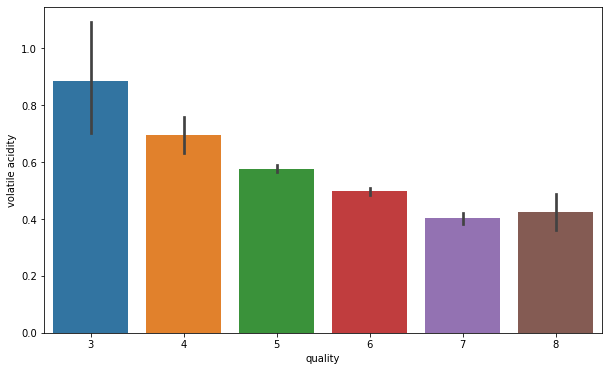

In [65]:
# perbedaan nya adalah bar plot untuk volatile acidity merupakan rata rata, misalnya yg qualitas 3 rata2 nya skitar 0.8, dan diatas merupakan distibusinya
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

In [66]:
# ax = dataset.iloc[:,0].plot.hist(bins=12, alpha=0.9)

In [67]:
dataset.loc[ dataset['quality'] <= 6.1, 'quality'] = 0
dataset.loc[ dataset['quality'] > 6.1, 'quality'] = 1
dataset['quality'] = dataset['quality'].astype(int)


In [68]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [69]:
train_df = dataset[:1200]
test_df = dataset[1200:]
combine = [train_df, test_df]

In [70]:
train_df['fixed acidity band'] = pd.qcut(train_df['fixed acidity'], 4)
train_df[['fixed acidity band', 'quality']].groupby(['fixed acidity band'], as_index=False).mean().sort_values(by='fixed acidity band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,fixed acidity band,quality
0,"(4.598999999999999, 7.3]",0.098039
1,"(7.3, 8.3]",0.109034
2,"(8.3, 9.6]",0.172043
3,"(9.6, 15.9]",0.238095


In [71]:
dataset.loc[ dataset['fixed acidity'] <= 7.3, 'fixed acidity'] = 0
dataset.loc[(dataset['fixed acidity'] > 7.3) & (dataset['fixed acidity'] <= 8.3), 'fixed acidity'] = 1
dataset.loc[(dataset['fixed acidity'] > 8.3) & (dataset['fixed acidity'] <= 9.6), 'fixed acidity']   = 2
dataset.loc[ dataset['fixed acidity'] > 9.6, 'fixed acidity'] = 3
dataset['fixed acidity'] = dataset['fixed acidity'].astype(int)

In [72]:
train_df['volatile acidity band'] = pd.qcut(train_df['volatile acidity'], 4)
train_df[['volatile acidity band', 'quality']].groupby(['volatile acidity band'], as_index=False).mean().sort_values(by='volatile acidity band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,volatile acidity band,quality
0,"(0.119, 0.39]",0.315789
1,"(0.39, 0.5]",0.119298
2,"(0.5, 0.63]",0.091503
3,"(0.63, 1.33]",0.066434


In [73]:
dataset.loc[ dataset['volatile acidity'] <= 0.39, 'volatile acidity'] = 0
dataset.loc[(dataset['volatile acidity'] > 0.39) & (dataset['volatile acidity'] <= 0.5), 'volatile acidity'] = 1
dataset.loc[(dataset['volatile acidity'] > 0.5) & (dataset['volatile acidity'] <= 0.63), 'volatile acidity']   = 2
dataset.loc[ dataset['volatile acidity'] > 0.63, 'volatile acidity'] = 3
dataset['volatile acidity'] = dataset['volatile acidity'].astype(int)

In [74]:
train_df['citric acid band'] = pd.qcut(train_df['citric acid'], 3)
train_df[['citric acid band', 'quality']].groupby(['citric acid band'], as_index=False).mean().sort_values(by='citric acid band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,citric acid band,quality
0,"(-0.001, 0.19]",0.086849
1,"(0.19, 0.4]",0.127139
2,"(0.4, 1.0]",0.247423


In [75]:
dataset.loc[ dataset['citric acid'] <= 0.19, 'citric acid'] = 0
dataset.loc[(dataset['citric acid'] > 0.19) & (dataset['citric acid'] <= 0.4), 'citric acid'] = 1
dataset.loc[ dataset['citric acid'] > 0.4, 'citric acid'] = 2
dataset['citric acid'] = dataset['citric acid'].astype(int)

In [76]:
train_df['residual sugar band'] = pd.qcut(train_df['residual sugar'], 3)
train_df[['residual sugar band', 'quality']].groupby(['residual sugar band'], as_index=False).mean().sort_values(by='residual sugar band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,residual sugar band,quality
0,"(0.899, 2.0]",0.114219
1,"(2.0, 2.5]",0.167920
2,"(2.5, 15.5]",0.180108


In [77]:
dataset.loc[ dataset['residual sugar'] <= 2.0, 'residual sugar'] = 0
dataset.loc[(dataset['residual sugar'] > 2.0) & (dataset['residual sugar'] <= 2.5), 'residual sugar'] = 1
dataset.loc[ dataset['residual sugar'] > 2.5, 'residual sugar'] = 2
dataset['residual sugar'] = dataset['residual sugar'].astype(int)

In [78]:
train_df['chlorides band'] = pd.qcut(train_df['chlorides'], 2)
train_df[['chlorides band', 'quality']].groupby(['chlorides band'], as_index=False).mean().sort_values(by='chlorides band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,chlorides band,quality
0,"(0.011, 0.08]",0.189369
1,"(0.08, 0.611]",0.115385


In [79]:
dataset.loc[ dataset['chlorides'] <= 0.08, 'chlorides'] = 0
dataset.loc[ dataset['chlorides'] > 0.08, 'chlorides'] = 1
dataset['chlorides'] = dataset['chlorides'].astype(int)

In [80]:
train_df['free sulfur dioxide band'] = pd.qcut(train_df['free sulfur dioxide'], 3)
train_df[['free sulfur dioxide band', 'quality']].groupby(['free sulfur dioxide band'], as_index=False).mean().sort_values(by='free sulfur dioxide band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,free sulfur dioxide band,quality
0,"(0.999, 9.0]",0.192941
1,"(9.0, 17.0]",0.156410
2,"(17.0, 68.0]",0.103896


In [81]:
dataset.loc[ dataset['free sulfur dioxide'] <= 9.0, 'free sulfur dioxide'] = 0
dataset.loc[(dataset['free sulfur dioxide'] > 9.0) & (dataset['free sulfur dioxide'] <= 17.0), 'free sulfur dioxide'] = 1
dataset.loc[ dataset['free sulfur dioxide'] > 17.0, 'free sulfur dioxide'] = 2
dataset['free sulfur dioxide'] = dataset['free sulfur dioxide'].astype(int)

In [82]:
train_df['total sulfur dioxide band'] = pd.qcut(train_df['total sulfur dioxide'], 5)
train_df[['total sulfur dioxide band', 'quality']].groupby(['total sulfur dioxide band'], as_index=False).mean().sort_values(by='total sulfur dioxide band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total sulfur dioxide band,quality
0,"(5.999, 19.0]",0.254826
1,"(19.0, 30.6]",0.212670
2,"(30.6, 46.0]",0.132530
3,"(46.0, 70.2]",0.090909
4,"(70.2, 289.0]",0.066667


In [83]:
dataset.loc[ dataset['total sulfur dioxide'] <= 19.0, 'total sulfur dioxide'] = 0
dataset.loc[(dataset['total sulfur dioxide'] > 19.0) & (dataset['total sulfur dioxide'] <= 30.6), 'total sulfur dioxide'] = 1
dataset.loc[(dataset['total sulfur dioxide'] > 30.6) & (dataset['total sulfur dioxide'] <= 46.0), 'total sulfur dioxide']   = 2
dataset.loc[(dataset['total sulfur dioxide'] > 46.0) & (dataset['total sulfur dioxide'] <= 70.2), 'total sulfur dioxide']   = 3
dataset.loc[ dataset['total sulfur dioxide'] > 70.2, 'total sulfur dioxide'] = 4
dataset['total sulfur dioxide'] = dataset['total sulfur dioxide'].astype(int)

In [84]:
train_df['density band'] = pd.qcut(train_df['density'], 2)
train_df[['density band', 'quality']].groupby(['density band'], as_index=False).mean().sort_values(by='density band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,density band,quality
0,"(0.989, 0.997]",0.195
1,"(0.997, 1.003]",0.110


In [85]:
dataset.loc[ dataset['density'] <= 0.997, 'density'] = 0
dataset.loc[ dataset['density'] > 0.997, 'density'] = 1
dataset['density'] = dataset['density'].astype(int)

In [86]:
train_df['pH band'] = pd.qcut(train_df['pH'], 3)
train_df[['pH band', 'quality']].groupby(['pH band'], as_index=False).mean().sort_values(by='pH band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pH band,quality
0,"(2.7390000000000003, 3.23]",0.174941
1,"(3.23, 3.36]",0.164557
2,"(3.36, 3.9]",0.115183


In [87]:
dataset.loc[ dataset['pH'] <= 3.23, 'pH'] = 0
dataset.loc[(dataset['pH'] > 3.23) & (dataset['pH'] <= 3.36), 'pH'] = 1
dataset.loc[ dataset['pH'] > 3.36, 'pH'] = 2
dataset['pH'] = dataset['pH'].astype(int)

In [88]:
train_df['sulphates band'] = pd.qcut(train_df['sulphates'], 5)
train_df[['sulphates band', 'quality']].groupby(['sulphates band'], as_index=False).mean().sort_values(by='sulphates band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sulphates band,quality
0,"(0.329, 0.54]",0.031621
1,"(0.54, 0.6]",0.077491
2,"(0.6, 0.66]",0.124424
3,"(0.66, 0.77]",0.282609
4,"(0.77, 2.0]",0.270742


In [89]:
dataset.loc[ dataset['sulphates'] <=  0.54, 'sulphates'] = 0
dataset.loc[(dataset['sulphates'] >  0.54) & (dataset['sulphates'] <= 0.6), 'sulphates'] = 1
dataset.loc[(dataset['sulphates'] > 0.6) & (dataset['sulphates'] <= 0.66), 'sulphates']   = 2
dataset.loc[(dataset['sulphates'] > 0.66) & (dataset['sulphates'] <= 0.77), 'sulphates']   = 3
dataset.loc[ dataset['sulphates'] > 0.77, 'sulphates'] = 4
dataset['sulphates'] = dataset['sulphates'].astype(int)

In [90]:
train_df['alcohol band'] = pd.qcut(train_df['alcohol'], 7)
train_df[['alcohol band', 'quality']].groupby(['alcohol band'], as_index=False).mean().sort_values(by='alcohol band', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,alcohol band,quality
0,"(8.399000000000001, 9.4]",0.007722
1,"(9.4, 9.5]",0.017094
2,"(9.5, 9.9]",0.046784
3,"(9.9, 10.4]",0.066667
4,"(10.4, 10.9]",0.209150
5,"(10.9, 11.7]",0.258824
6,"(11.7, 14.9]",0.509091


In [91]:
dataset.loc[ dataset['alcohol'] <=  9.4, 'alcohol'] = 0
dataset.loc[(dataset['alcohol'] >  9.4) & (dataset['alcohol'] <= 9.5), 'alcohol'] = 1
dataset.loc[(dataset['alcohol'] > 9.5) & (dataset['alcohol'] <= 9.9), 'alcohol']   = 2
dataset.loc[(dataset['alcohol'] > 9.9) & (dataset['alcohol'] <= 10.4), 'alcohol']   = 3
dataset.loc[(dataset['alcohol'] > 10.4) & (dataset['alcohol'] <= 10.9), 'alcohol']   = 4
dataset.loc[(dataset['alcohol'] > 10.9) & (dataset['alcohol'] <= 11.7), 'alcohol']   = 5
dataset.loc[ dataset['alcohol'] > 11.7, 'alcohol'] = 6
dataset['alcohol'] = dataset['alcohol'].astype(int)

In [92]:
# train_df = train_df.drop(['fixed acidity band','volatile acidity band','citric acid band','residual sugar band','chlorides band','free sulfur dioxide band','total sulfur dioxide band','density band','pH band','sulphates band','alcohol band'], axis=1)

In [93]:
train_df = dataset[:1200]
test_df = dataset[1200:]
combine = [train_df, test_df]

In [94]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,3,0,0,0,1,2,1,2,4,0,0
1,1,3,0,2,1,2,3,0,0,4,2,0
2,1,3,0,1,1,1,3,0,1,4,2,0
3,3,0,2,0,0,1,3,1,0,4,2,0
4,1,3,0,0,0,1,2,1,2,4,0,0


In [108]:
X_train = train_df.drop("quality", axis=1)
Y_train = train_df["quality"]
X_test  = test_df.drop("quality", axis=1).copy()
Y_test  = test_df["quality"]
X_train.shape, Y_train.shape, X_test.shape

((1200, 11), (1200,), (399, 11))

In [109]:
# Membuat model
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

89.72

In [110]:
# menghitung koefisien di model logreg
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
10,quality,0.723045
9,alcohol,0.457175
0,volatile acidity,0.257602
3,chlorides,0.139680
5,total sulfur dioxide,0.081661
7,pH,0.015847
8,sulphates,-0.098668
4,free sulfur dioxide,-0.222148
6,density,-0.259403
2,residual sugar,-0.313561


In [111]:
# SVM
svc = SVC()
svc.fit(X_train, Y_train)
# Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

90.98

In [113]:
# knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

88.47

In [114]:
# NB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

84.71

In [115]:
# algo model perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
# Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron

91.48

In [116]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


90.73

In [117]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd

91.48

In [118]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

82.46

In [120]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
# Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

89.47

In [121]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Perceptron,91.48
6,Stochastic Gradient Decent,91.48
0,Support Vector Machines,90.98
7,Linear SVC,90.73
2,Logistic Regression,89.72
3,Random Forest,89.47
1,KNN,88.47
4,Naive Bayes,84.71
8,Decision Tree,82.46
